# Exploratory Data Analysis Homework

## Dataset info:
### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   ### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  ## Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Part 1: EDA

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats


# Load dataset
import requests
import io

# I use the raw URL to download the raw CSV content from my github account
data_url = "https://raw.githubusercontent.com/kharkovsailing/EDA-with-Python/main/bank-additional-full.csv"  # Updated URL

# Request the CSV data and decode it.
dataset = requests.get(data_url).content.decode('utf-8')

# Use StringIO to handle the text content like a file.
data = pd.read_csv(io.StringIO(dataset), sep=";")  # Added sep=";"

data.shape


# data = pd.read_csv("/content/bank-additional-full.csv", sep=";")

## Data Inspection
## Univariate Analysis
print(data.info())
print(data.describe())
print(data.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

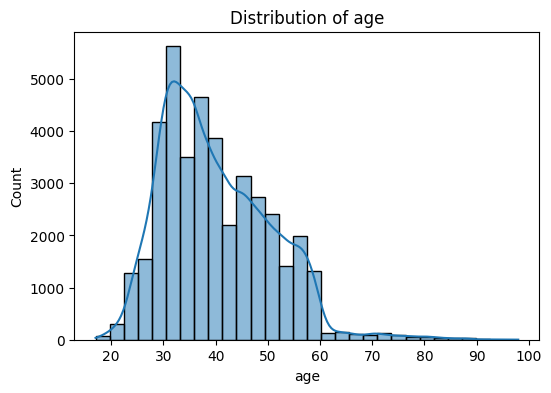

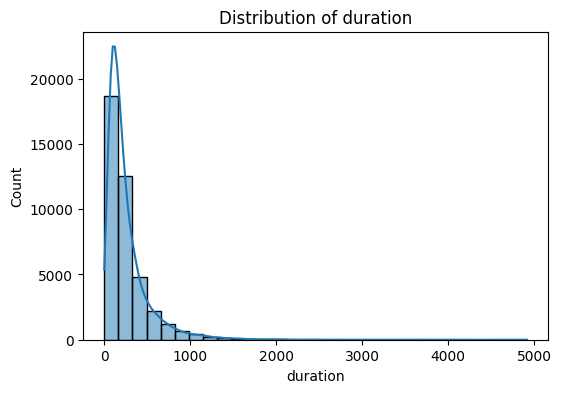

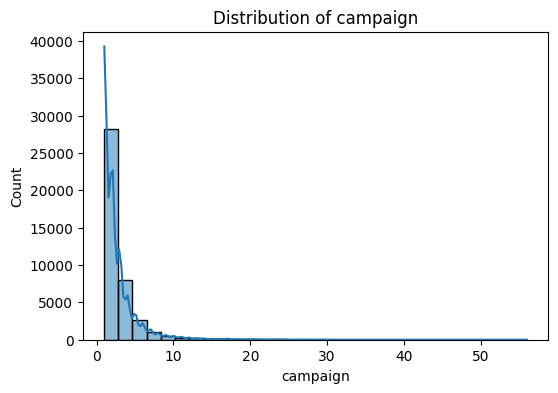

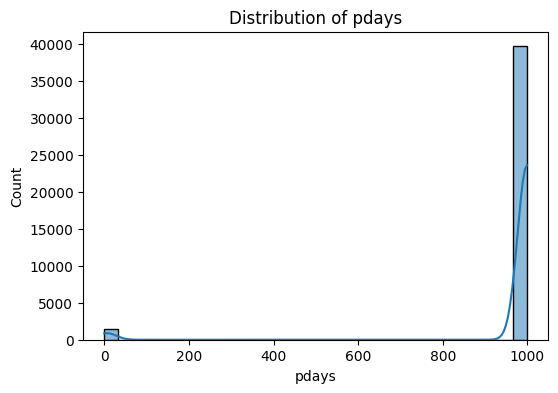

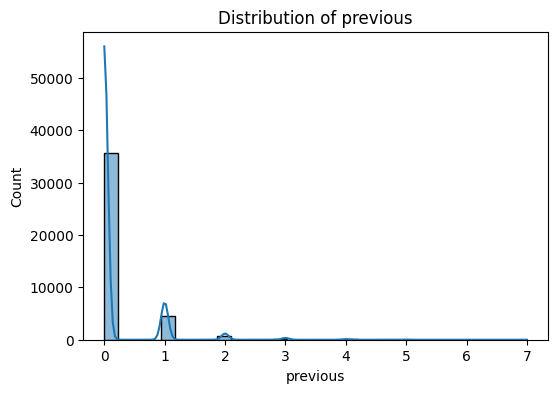

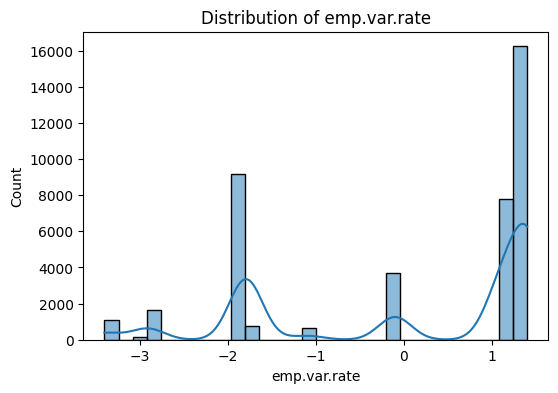

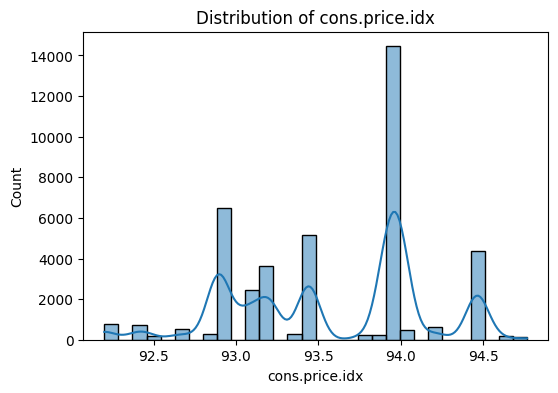

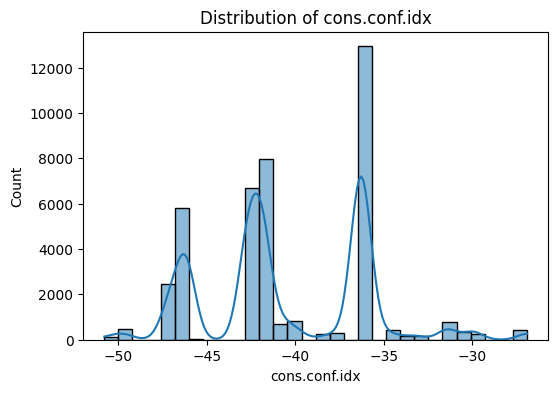

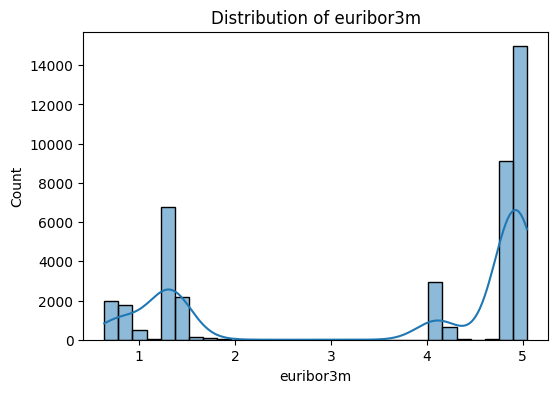

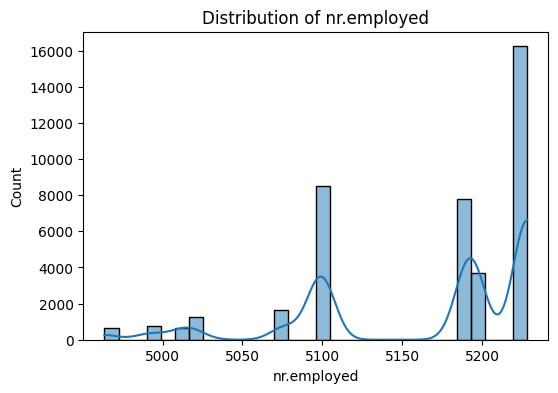

In [22]:
# Visualizing distributions of numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

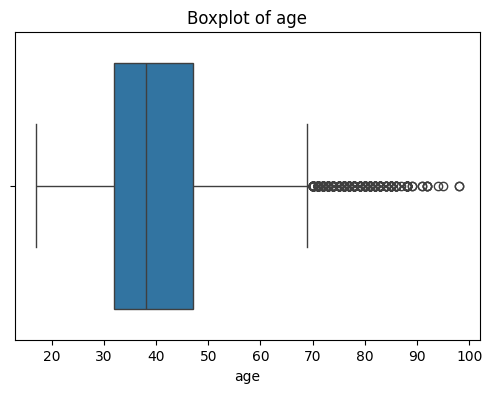

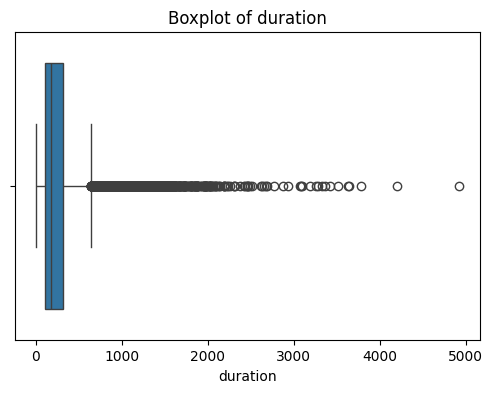

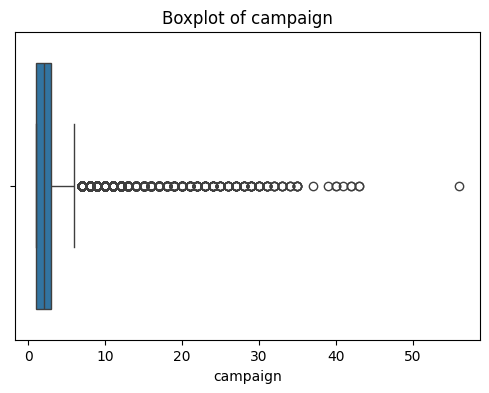

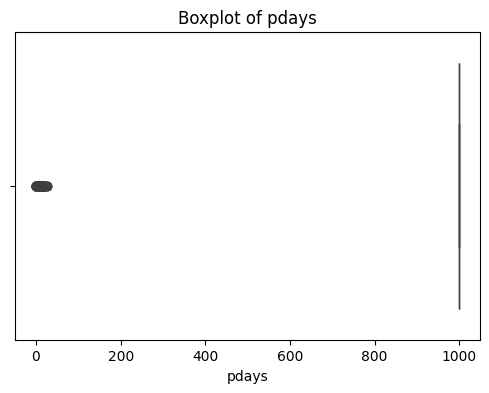

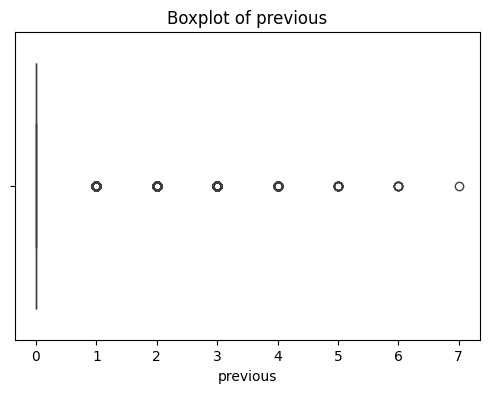

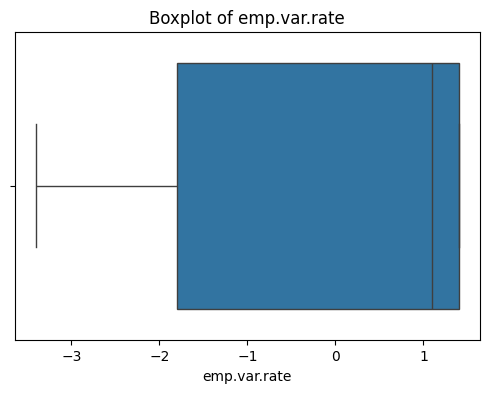

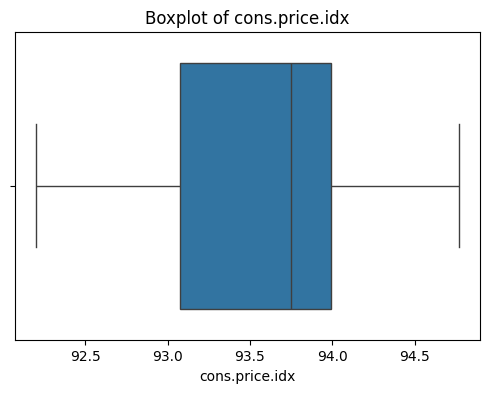

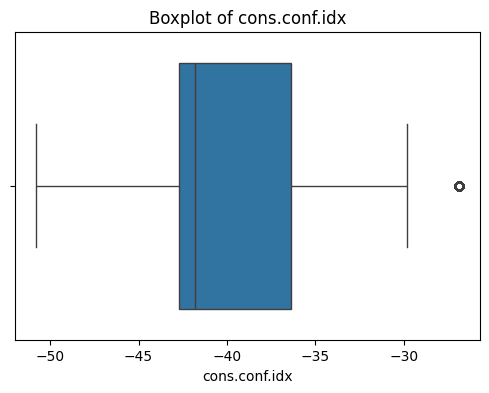

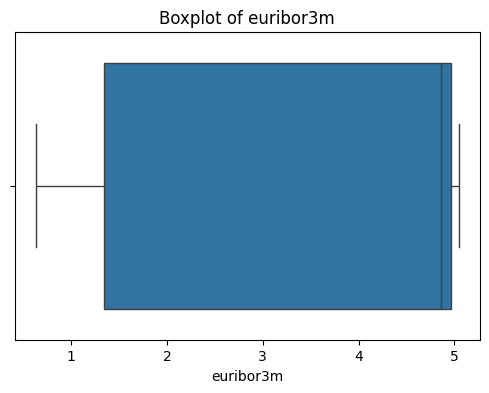

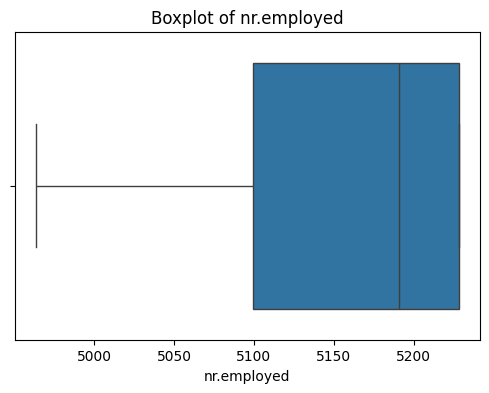

In [23]:
# Boxplot for detecting anomalies for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Detecting Outliers for "Age"

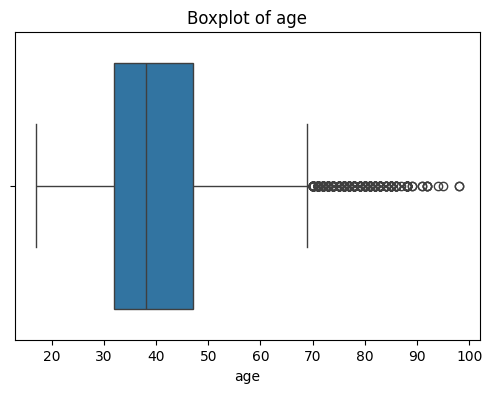

In [25]:
# Boxplot for age
def plot_boxplot(column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()
plot_boxplot("age")

In [14]:
# Boxplot Method (IQR - Interquartile Range)
## Calculate Outliers Using IQR
Q1 = data["age"].quantile(0.25)  # First quartile (25th percentile)
Q3 = data["age"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]
print(f"Number of outliers in age: {len(outliers)}")
print(outliers["age"].unique())
print(f"age lower bound: {lower_bound}")
print(f"age upper bound: {upper_bound}")

Number of outliers in age: 469
[70 76 73 88 95 77 75 80 72 82 71 78 85 79 83 81 74 87 91 86 98 94 84 92
 89]
age lower bound: 9.5
age upper bound: 69.5


In [13]:
## Z-Score Method for detecting outlliers
data["age_zscore"] = np.abs(stats.zscore(data["age"]))
outliers_z = data[data["age_zscore"] > 3]  # Z-score above 3 is usually considered an outlier

print(f"Number of outliers detected using Z-score: {len(outliers_z)}")


Number of outliers detected using Z-score: 369


Interpretation: If an age has a Z-score > 3, it is considered an outlier.

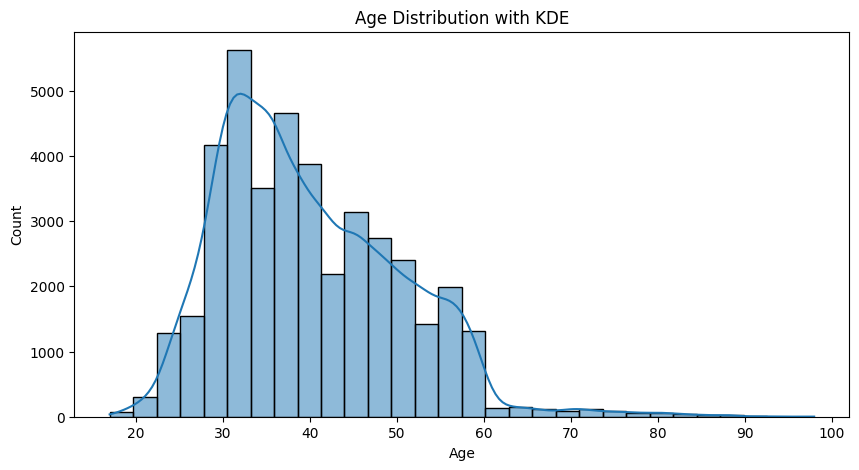

In [16]:
## Histogram + KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(data["age"], bins=30, kde=True)
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Interpretation: Here we can see very few values at the extreme ends (age > 60), they might be outliers.

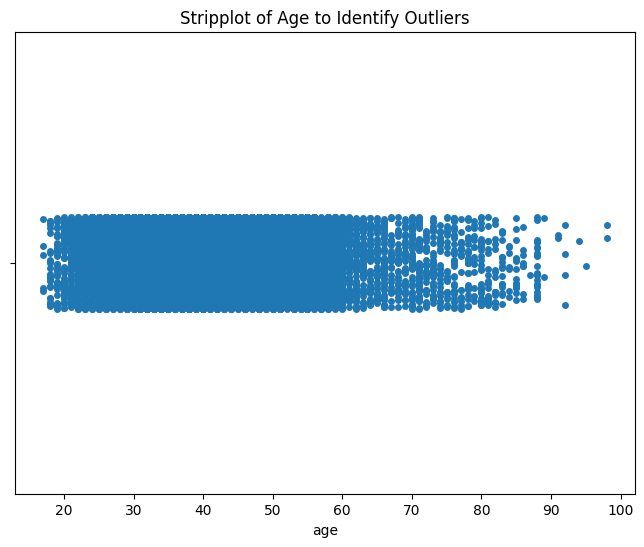

In [18]:
## Scatterplot for Outliers Detection
plt.figure(figsize=(8, 6))
sns.stripplot(x=data["age"], jitter=True)
plt.title("Stripplot of Age to Identify Outliers")
plt.show()


Interpretation: This will spread the age values to help spot isolated points. Age < 20 and  Age > 60 can be outliers.

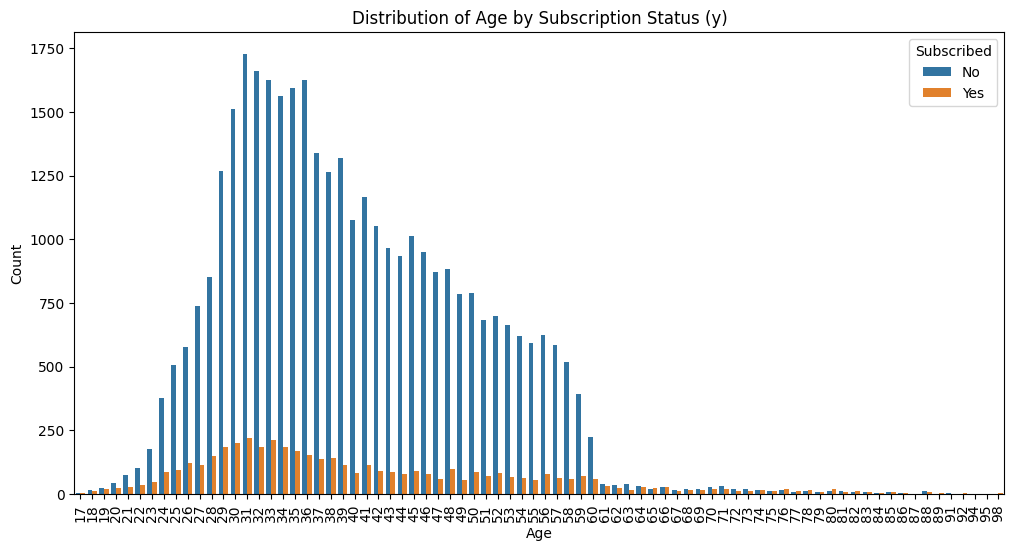

In [21]:
## Countplot of Age vs Subscription (y)
## This shows how many clients of each age subscribed (y="yes") or didn't (y="no").
plt.figure(figsize=(12, 6))
sns.countplot(x="age", hue="y", data=data, order=sorted(data["age"].unique()))
plt.xticks(rotation=90)
plt.title("Distribution of Age by Subscription Status (y)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Subscribed", labels=["No", "Yes"])
plt.show()


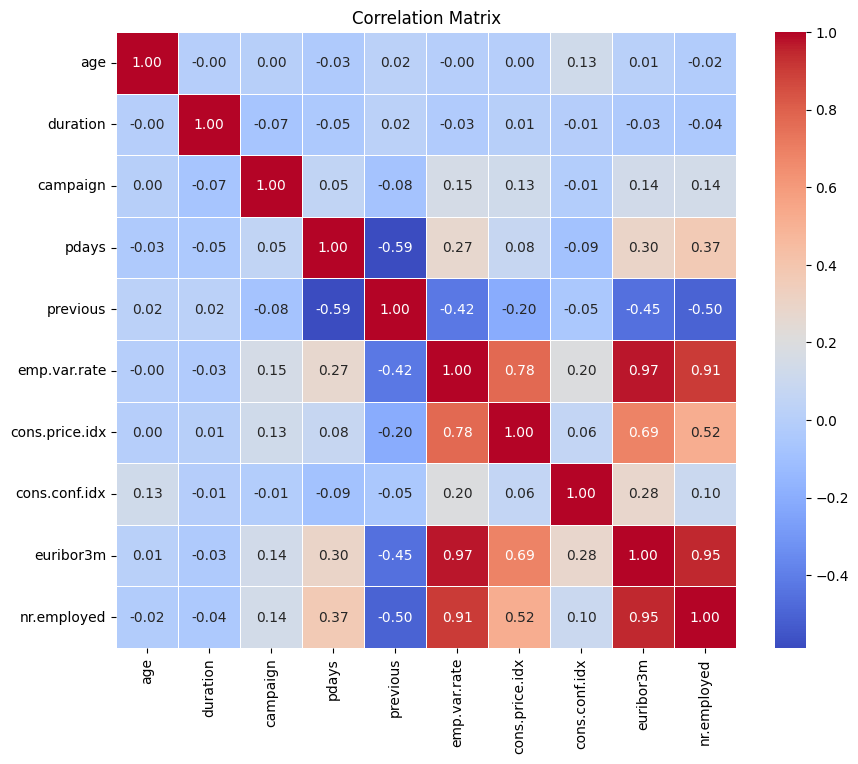

In [10]:
## Multivariate Analysis
## Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

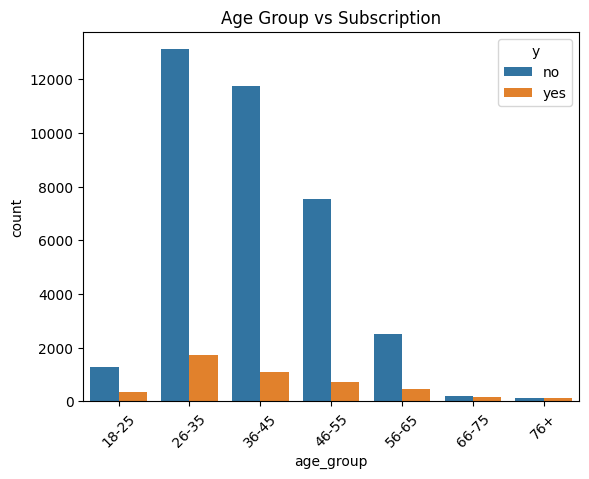

In [27]:
# Creating new feature: Age Group
data["age_group"] = pd.cut(data["age"], bins=[18, 25, 35, 45, 55, 65, 75, 90],
                            labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76+"])
sns.countplot(x=data["age_group"], hue=data["y"])
plt.title("Age Group vs Subscription")
plt.xticks(rotation=45)
plt.show()

## Part 2: Data Preparation

In [4]:
# Part 2: Data Preparation
## Handling Missing Values
data.replace("unknown", np.nan, inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

## Handling Outliers
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["age"] >= lower_bound) & (data["age"] <= upper_bound)]

In [6]:
## Encoding Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = ohe.fit_transform(data[categorical_cols])

## Standardizing Numerical Variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(data[numerical_cols])

## Part 3: Dimensionality Reduction

### Principal Component Analysis (PCA)

Explained variance ratio: [0.39188047 0.13461193]


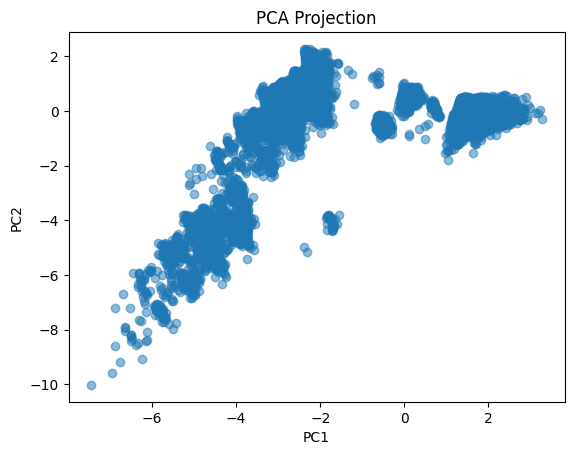

In [7]:
# Part 3: Dimensionality Reduction
## PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_numerical_data)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

## Visualization of PCA
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()


## t-SNE (t-distributed Stochastic Neighbor Embedding)

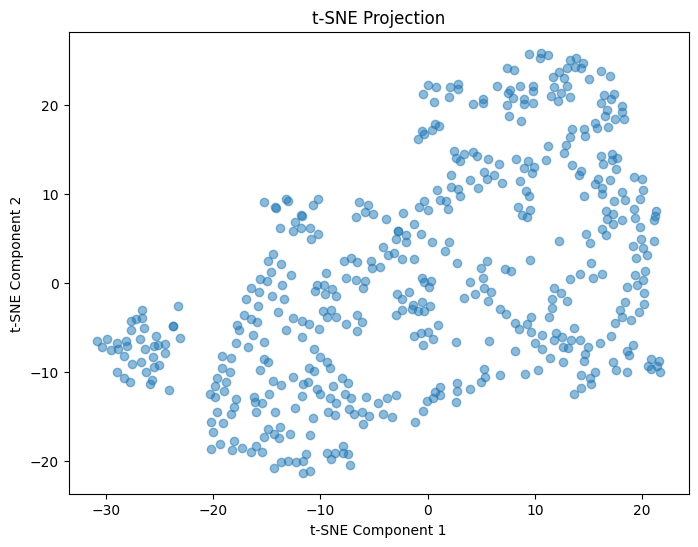

In [15]:
## t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions first, ensuring n_components is less than or equal to the number of features
pca = PCA(n_components=10)  # Changed n_components to 10
pca_result = pca.fit_transform(scaled_numerical_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(pca_result[:500])  # Limit to 500 samples

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection")
plt.show()

In [17]:
# Conclusion and Next Steps
print("EDA, Data Preparation, and Dimensionality Reduction completed.")

EDA, Data Preparation, and Dimensionality Reduction completed.
